# DATA QUALITY AND ANALYTICAL DATAMART CREATION

## SET UP

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True

## DATA UPLOAD

This case consists of 4 files:

* Plant 1, generation data
* Floor 1, environmental sensor data
* Plant 2, generation data
* Plant 2, environmental sensor data

### Data loading plant 1 - generation data

In [2]:
p1g = pd.read_csv('../Data/Plant_1_Generation_Data.csv')
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Data loading plant 2 - generation data

In [3]:
p2g = pd.read_csv('../Data/Plant_2_Generation_Data.csv')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Data upload plant 1 - environmental sensor data


In [4]:
p1w = pd.read_csv('../Data/Plant_1_Weather_Sensor_Data.csv')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Data upload plant 2 - environmental sensor data

In [5]:
p2w = pd.read_csv('../Data/Plant_2_Weather_Sensor_Data.csv')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## DATA QUALITY

### Plant quality 1 - generation data

Overview

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


We see that there are no nulls.

We see that DATE_TIME is as object.

We convert DATE_TIME to type datetime.

In [7]:
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME,dayfirst=True)

We make a sample to review it.

In [8]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


We check that the plant identifier is unique.

In [9]:
p1g.PLANT_ID.unique()

array([4135001])

Let's replace it with a more readable one.

In [10]:
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001, 'p1')
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


We review the statistics.

In [11]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


Let's remove the scientific notation display.

In [12]:
pd.options.display.float_format = '{:15.2f}'.format

In [13]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.00,3147.43,4036.46,0.00,0.00,429.00,6366.96,14471.12
AC_POWER,68778.00,307.80,394.40,0.00,0.00,41.49,623.62,1410.95
DAILY_YIELD,68778.00,3295.97,3145.18,0.00,0.00,2658.71,6274.00,9163.00
TOTAL_YIELD,68778.00,6978711.76,416271.98,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00


There's a broad difference in means between DC and AC, a bit strange.

Let's visualize it.

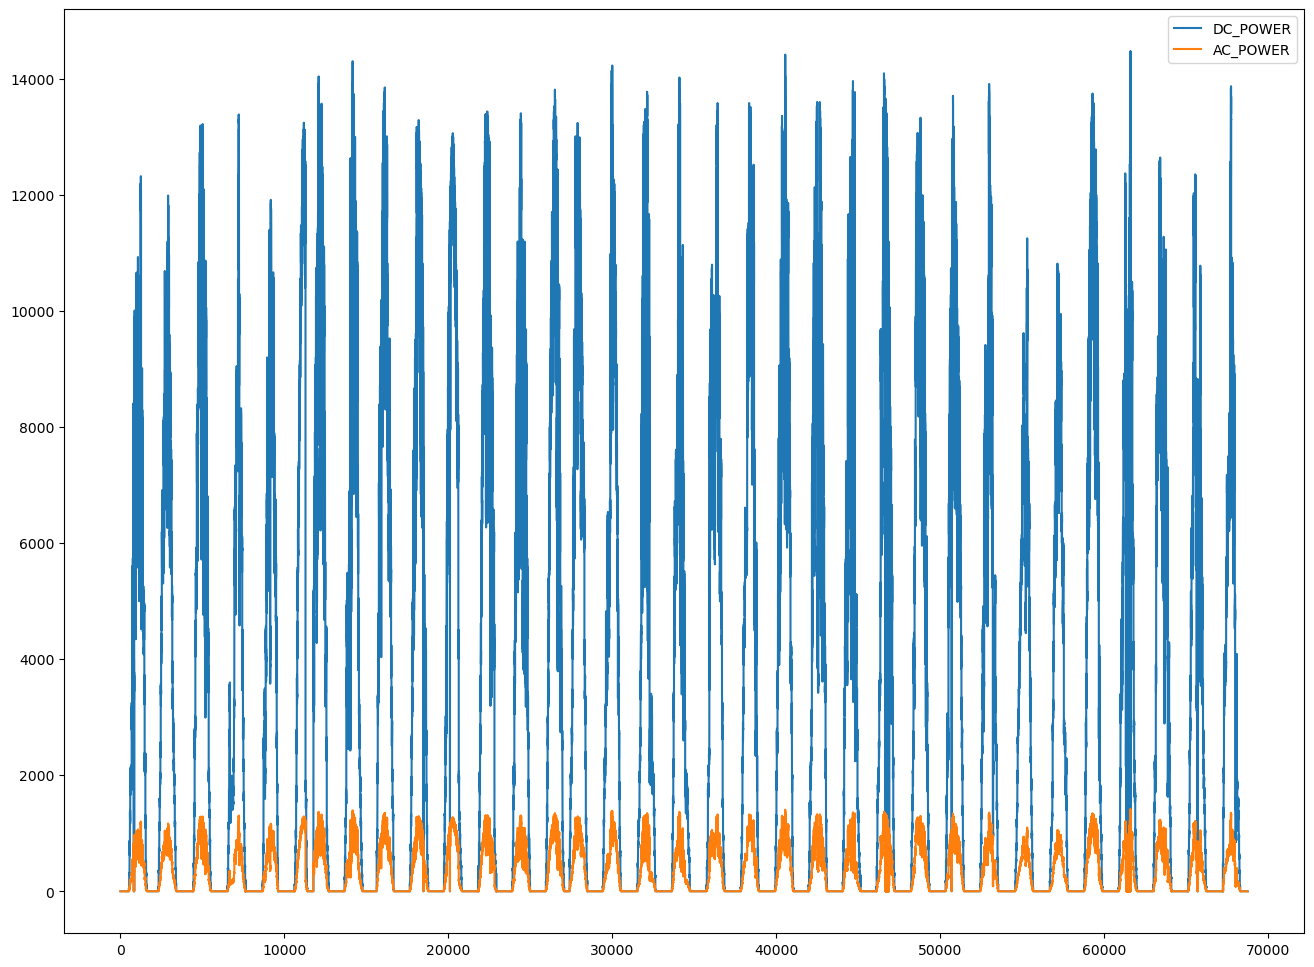

In [33]:
(p1g[['DC_POWER','AC_POWER']]
 .plot(figsize = (16,12))
);

The diference is huge.

First we are going to check if they go in the same direction even if it is on a different scale (with a correlation), and then we are going to check what is the average ratio between both measures.

In [15]:
p1g.DC_POWER.corr(p1g.AC_POWER)

0.9999962553331395

In [16]:
(p1g.DC_POWER / p1g.AC_POWER).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

It seems that the inverters are transforming only 10% from DC to AC, which at a first glance is very low.

Anyhow, we'll continue exploring this in the analysis part and comparing it with Plant 2 to see if the same thing happens.

We analyze the categorical variable SOURCE_KEY, which is the identifier of the inverters.

In [17]:
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,p1,uHbuxQJl8lW7ozc,0.00,0.00,5967.00,7287002.00
68774,2020-06-17 23:45:00,p1,wCURE6d3bPkepu2,0.00,0.00,5147.62,7028601.00
68775,2020-06-17 23:45:00,p1,z9Y9gH1T5YWrNuG,0.00,0.00,5819.00,7251204.00
68776,2020-06-17 23:45:00,p1,zBIq5rxdHJRwDNY,0.00,0.00,5817.00,6583369.00


In [18]:
p1g.SOURCE_KEY.nunique()

22

In [19]:
p1g.SOURCE_KEY.value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

Conclusions:

     * Floor 1 has 22 inverters
     * All have a similar number of measures although not exactly the same
     * They could be stops due to maintenance, or simple data loss, but we write it down for the analysis phase

We are going to analyze the DAILY_YIELD variables, since the metadata tells us that the TOTAL_YIELD variable is the accumulated total **per inverter**, but in DAILY_YIELD it does not specify it, so we do not know if it is accumulated per inverter or per plant.

The hypothesis is the following: if it is per plant, there should be no differences between the data from the different inverters at the same specific moment.

And therefore if we see that there are differences then it is that the data is due to the inverter.

To verify it, it is useful to take a sample of inverters.

In [20]:
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,p1,uHbuxQJl8lW7ozc,0.00,0.00,5967.00,7287002.00
68774,2020-06-17 23:45:00,p1,wCURE6d3bPkepu2,0.00,0.00,5147.62,7028601.00
68775,2020-06-17 23:45:00,p1,z9Y9gH1T5YWrNuG,0.00,0.00,5819.00,7251204.00
68776,2020-06-17 23:45:00,p1,zBIq5rxdHJRwDNY,0.00,0.00,5817.00,6583369.00


In [21]:
seleccion = list(p1g.SOURCE_KEY.unique()[:5])

In [23]:
temp = p1g[p1g.SOURCE_KEY.isin(seleccion)].set_index('DATE_TIME')
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


In the data we already see that it is different, but we are going to check on more data so that it is not an effect of those specific records.

We are going to see it graphically, and for simplicity we are going to take only a sample of days.

Since we have the date as index we remember that we can use partial and slice indexing.

In [24]:
temp = temp.loc['2020-06-01':'2020-06-05']
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-01 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,829.00,6377931.00
2020-06-01 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6311432.00
2020-06-01 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7115304.00
2020-06-01 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,730.38,7727821.00
2020-06-01 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7286760.00
...,...,...,...,...,...,...
2020-06-05 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,7162.00,6412542.00
2020-06-05 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6348557.00
2020-06-05 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7152486.00


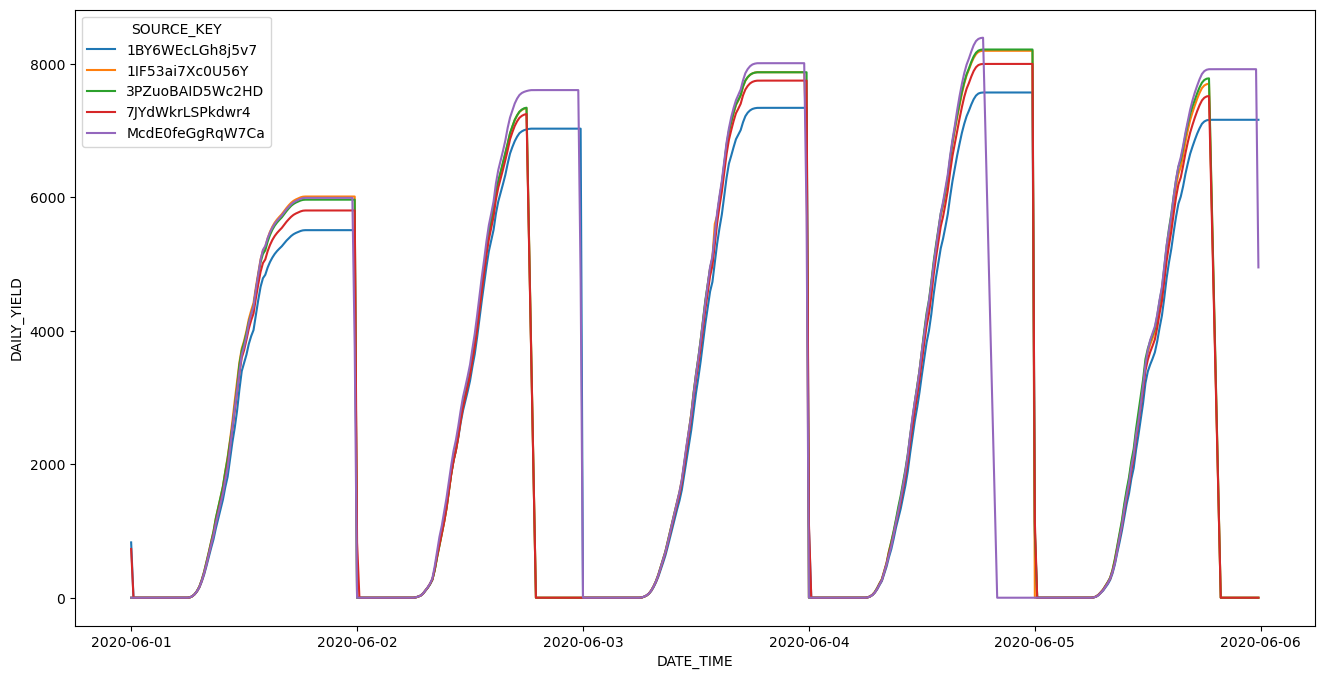

In [32]:
(plt.figure(figsize = (16,8)),
sns.lineplot(data = temp, 
             x = temp.index, 
             y = 'DAILY_YIELD', 
             hue = 'SOURCE_KEY')
);

Definitely different inverters have different data at the same time, so we conclude that this variable is **per inverter**

Finally we are going to analyze the period in which we have data and if the number of daily measurements is constant.

In [93]:
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,p1,uHbuxQJl8lW7ozc,0.00,0.00,5967.00,7287002.00
68774,2020-06-17 23:45:00,p1,wCURE6d3bPkepu2,0.00,0.00,5147.62,7028601.00
68775,2020-06-17 23:45:00,p1,z9Y9gH1T5YWrNuG,0.00,0.00,5819.00,7251204.00
68776,2020-06-17 23:45:00,p1,zBIq5rxdHJRwDNY,0.00,0.00,5817.00,6583369.00


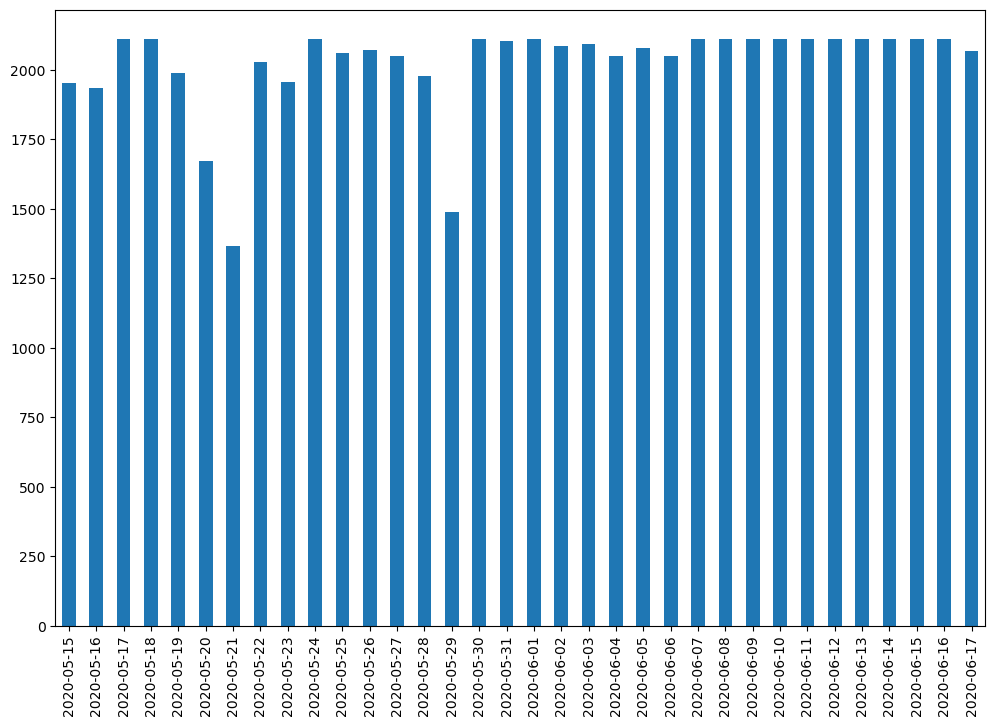

In [29]:
(p1g
 .DATE_TIME
 .dt
 .date
 .value_counts()
 .sort_index()
 .plot.bar(figsize = (12,8))
);

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, there are no intermediate days missing
* But some days like 05/21 or 05/29 have fewer measurements
* So it doesn't look 100% regular

### Data quality plant 1 - environmental sensor data

In [34]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


We correct the type of DATE_TIME

In [35]:
p1w.DATE_TIME = pd.to_datetime(p1w.DATE_TIME)
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [36]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00


We replaced the name of the plant.

In [37]:
p1w['PLANT_ID'] = p1w.PLANT_ID.replace(4135001, 'p1')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,p1,HmiyD2TTLFNqkNe,22.15,21.48,0.00
3178,2020-06-17 23:00:00,p1,HmiyD2TTLFNqkNe,22.13,21.39,0.00
3179,2020-06-17 23:15:00,p1,HmiyD2TTLFNqkNe,22.01,20.71,0.00
3180,2020-06-17 23:30:00,p1,HmiyD2TTLFNqkNe,21.97,20.73,0.00


We review statistics

In [38]:
p1w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3182.00,25.53,3.35,20.40,22.71,24.61,27.92,35.25
MODULE_TEMPERATURE,3182.00,31.09,12.26,18.14,21.09,24.62,41.31,65.55
IRRADIATION,3182.00,0.23,0.30,0.00,0.00,0.02,0.45,1.22


We check the categorical variable, which is the sensor identifier.

In [39]:
p1w.SOURCE_KEY.nunique()

1

There is only one sensor for environmental variables in the plant.

We check the dates

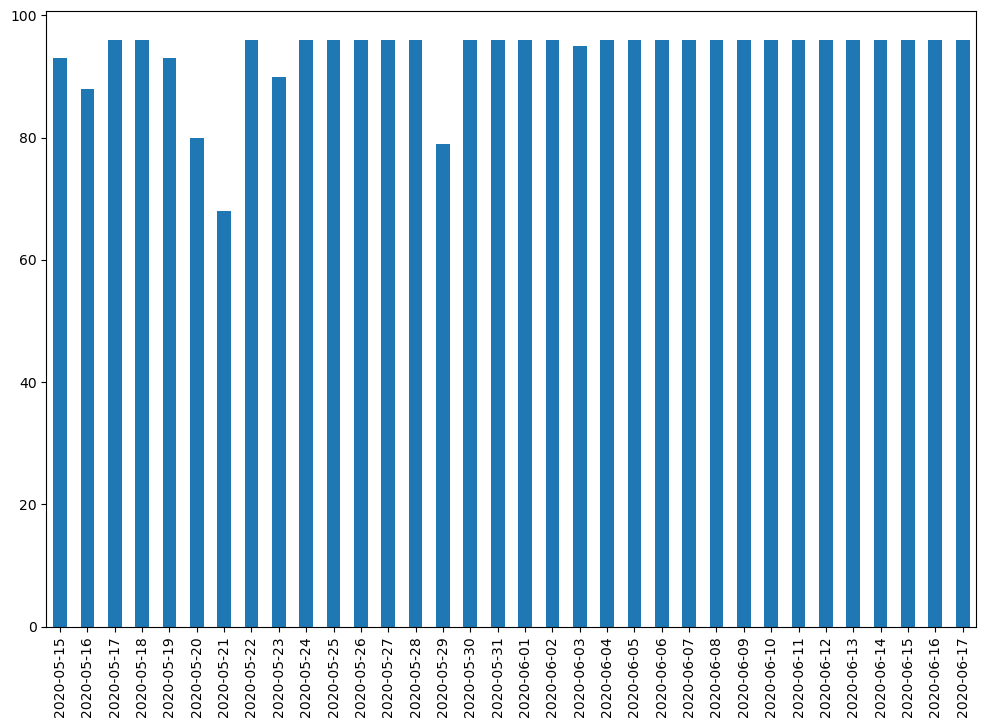

In [40]:
(p1w
 .DATE_TIME
 .dt
 .date
 .value_counts()
 .sort_index()
 .plot.bar(figsize = (12,8))
);

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, there are no intermediate days missing
* But some days like 05/21 or 05/29 have fewer measurements
* So it doesn't look 100% regular

### Plant quality 2 - generation data

In [41]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [42]:
p2g['DATE_TIME'] = pd.to_datetime(p2g.DATE_TIME)

In [43]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [44]:
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001, 'p2')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p2,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15 00:00:00,p2,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15 00:00:00,p2,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15 00:00:00,p2,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15 00:00:00,p2,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


In [45]:
p2g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,67698.00,246.70,370.57,0.00,0.00,0.00,446.59,1420.93
AC_POWER,67698.00,241.28,362.11,0.00,0.00,0.00,438.22,1385.42
DAILY_YIELD,67698.00,3294.89,2919.45,0.00,272.75,2911.00,5534.00,9873.00
TOTAL_YIELD,67698.00,658944788.42,729667771.07,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00


In this case the values of DC and AC are much closer to each other.

Let's calculate the ratio.

In [46]:
(p2g.DC_POWER / p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

Now the values of the ratio are very close to one.

We analyze the categorical variable, which is the identifier of the inverters.

In [47]:
p2g.SOURCE_KEY.nunique()

22

In [48]:
p2g.SOURCE_KEY.value_counts()

xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: SOURCE_KEY, dtype: int64

Conclusions:

* Floor 2 has 22 inverters
* All have a similar number of measures although not exactly the same
* Except for 4 that have about 800 measurements less
* We write it down for the analysis phase

Finally we will analyze the date.

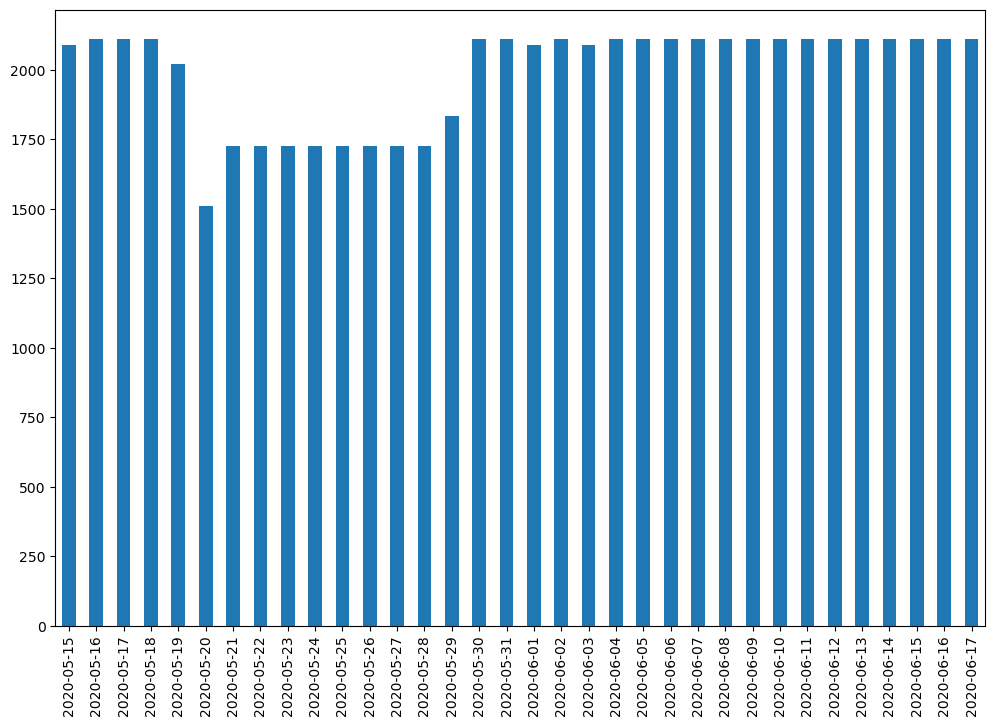

In [50]:
(p2g
 .DATE_TIME
 .dt
 .date
 .value_counts()
 .sort_index()
 .plot.bar(figsize = (12,8))
);

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, there are no intermediate days missing
* But some days like 05/20 and several more have fewer measurements
* So it doesn't look 100% regular

### Data quality plant 2 - environmental sensor data

In [51]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


We correct the type of DATE_TIME

In [52]:
p2w.DATE_TIME = pd.to_datetime(p2w.DATE_TIME)
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [53]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


We replace the name of the plant.

In [54]:
p2w['PLANT_ID'] = p2w.PLANT_ID.replace(4136001,'p2')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


We review the statistics.

In [55]:
p2w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3259.00,28.07,4.06,20.94,24.60,26.98,31.06,39.18
MODULE_TEMPERATURE,3259.00,32.77,11.34,20.27,23.72,27.53,40.48,66.64
IRRADIATION,3259.00,0.23,0.31,0.00,0.00,0.02,0.44,1.10


We analyze the categorical variable, which is the sensor identifier.

In [56]:
p2w.SOURCE_KEY.nunique()

1

There is only one sensor for environmental variables in the plant.

We revise the date

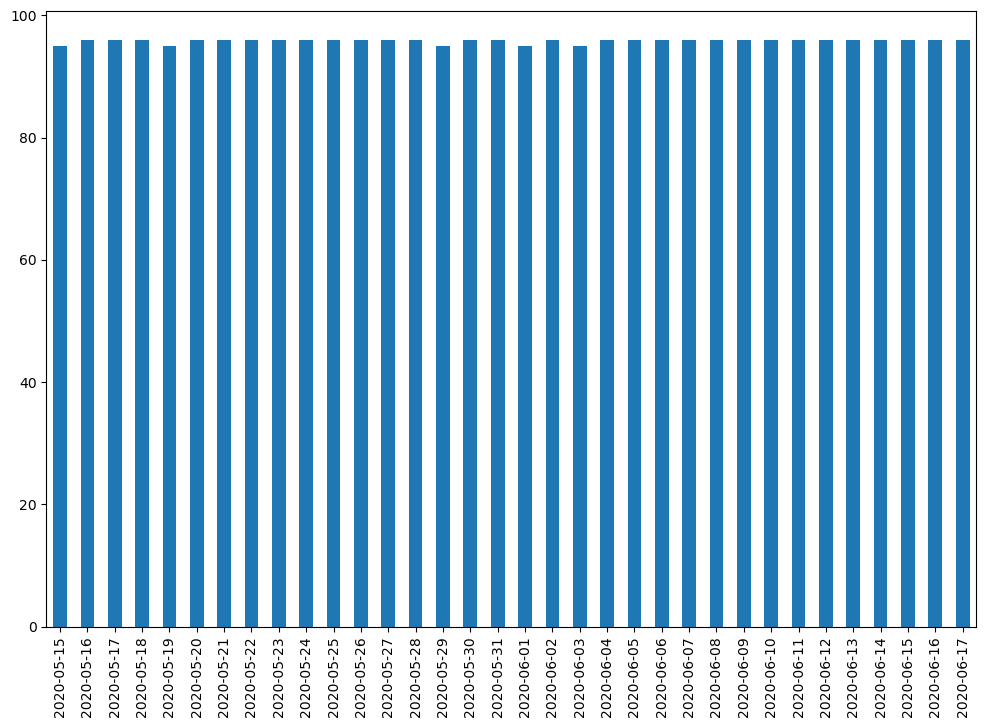

In [57]:
(p2w
 .DATE_TIME
 .dt
 .date
 .value_counts()
 .sort_index()
 .plot.bar(figsize = (12,8))
);

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, there are no intermediate days missing
* But some days like 05/15 or others have fewer measurements, although they are much less missing than in the other datasets
* But it doesn't look 100% regular

### Pending issues of data quality to analyze later

* On floor 1 it seems that the inverters are transforming only 10% from DC to AC, which a priori is very low.
* On floor 2 the ratio is much closer to 1.
* The measurement intervals are not 100% regular. There are days with fewer measurements, and there are also differences due to inverters.

## CREATION OF THE ANALYTICAL DATAMART

We are going to do a step-by-step union.

First the two generation datasets. Which will be a stack of records since the fields are the same.

After the two of environmental measures. Which will be a stack of records since the fields are the same.

And finally we will cross both partials through integration by key fields.

### Union of generation datasets

In [58]:
gener = pd.concat([p1g,p2g], axis = 'index')
gener

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Let's rename the variables now to make them more descriptive and usable.

In [77]:
gener.columns = ['the_date','plant','inverter_id','kw_dc','kw_ac','kw_day','kw_total']
gener

,the_date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Now that we have the 2 plants together we are going to do a consistency analysis, since according to the documentation kw_day and kw_total are directly related to kw_dc and kw_ac.

We are going to try to replicate the data of kw_day and kw_total.

In [78]:
gener2 = gener.copy()

We create a date variable to be able to make aggregations by it.

In [79]:
gener2['date'] = gener2.the_date.dt.date
gener2

,the_date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,date
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,2020-05-15
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,2020-05-15
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,2020-05-15
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,2020-05-15
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17


The sum per plant, date and inverter of kw_dc or kw_ac should match the maximum of kw_day.

In [80]:
gener2 = gener2.groupby(['plant','date','inverter_id']).agg({'kw_dc':sum,
                                                              'kw_ac':sum,
                                                              'kw_day':max,
                                                              'kw_total':max}).reset_index()
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


We order to be able to analyze.

In [81]:
gener2 = gener2.sort_values(['plant','inverter_id','date'])
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


Kw_day does not match either kw_dc or kw_ac at all.

We are going to see if it agrees with kw_total, for this we calculate the daily increase of kw_total that should coincide with the maximum of kw_day of the previous day.

In [82]:
gener2['lag1'] = gener2.groupby(['plant','inverter_id']).kw_total.shift(1)
gener2['increase'] = gener2.kw_total - gener2.lag1
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


We check on floor 1.

In [83]:
gener2[gener2.plant == 'p1'].head(50)

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
110,p1,2020-05-20,1BY6WEcLGh8j5v7,230412.62,22516.26,8249.00,6298346.00,6290097.00,8249.00
132,p1,2020-05-21,1BY6WEcLGh8j5v7,288676.60,28223.13,7243.00,6305589.00,6298346.00,7243.00
154,p1,2020-05-22,1BY6WEcLGh8j5v7,280809.07,27456.63,6848.00,6312437.00,6305589.00,6848.00
176,p1,2020-05-23,1BY6WEcLGh8j5v7,326468.27,31922.93,7966.00,6320403.00,6312437.00,7966.00
198,p1,2020-05-24,1BY6WEcLGh8j5v7,309111.73,30220.37,7537.00,6327940.00,6320403.00,7537.00


We check on floor 2.

In [84]:
gener2[gener2.plant == 'p2'].head(50)

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
748,p2,2020-05-15,4UPUqMRk7TRMgml,17112.65,16744.08,9425.00,2433212.00,NaN,NaN
770,p2,2020-05-16,4UPUqMRk7TRMgml,23305.45,22791.22,5677.00,2438889.00,2433212.00,5677.00
792,p2,2020-05-17,4UPUqMRk7TRMgml,25985.95,25430.42,6342.00,2445231.00,2438889.00,6342.00
814,p2,2020-05-18,4UPUqMRk7TRMgml,31218.58,30516.03,7641.00,2452872.00,2445231.00,7641.00
836,p2,2020-05-19,4UPUqMRk7TRMgml,8040.00,7878.39,7641.00,2454841.00,2452872.00,1969.00
858,p2,2020-05-20,4UPUqMRk7TRMgml,9852.13,9641.35,9423.00,2464264.00,2454841.00,9423.00
880,p2,2020-05-21,4UPUqMRk7TRMgml,37403.77,36540.63,9423.00,2473415.00,2464264.00,9151.00
898,p2,2020-05-22,4UPUqMRk7TRMgml,40414.35,39472.14,9863.00,2483278.00,2473415.00,9863.00
916,p2,2020-05-23,4UPUqMRk7TRMgml,39690.66,38769.69,9863.00,2492966.00,2483278.00,9688.00
934,p2,2020-05-24,4UPUqMRk7TRMgml,18963.72,18558.18,9688.00,2497601.00,2492966.00,4635.00


Conclusions:

* kw_day is consistent with kw_total but they are not consistent with kw_dc or kw_ac it is as if they were in different units or there was some calculation that we are not aware of, therefore we will have 2 blocks to use: either kw_dc with kw_ac, or kw_day with kw_total, but we can't mix them together.

### Union of environmental measurement datasets

In [85]:
temper = pd.concat([p1w,p2w], axis = 'index')
temper

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


Union of environmental measurement datasets

In [86]:
temper.columns = ['the_date','plant','sensor_id','t_ambience','t_module','irradiation']
temper

,the_date,plant,sensor_id,t_ambience,t_module,irradiation
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


### Creation of the analytical datamart

In this case, the key field is made up of date and plant and commands the generation dataset, since the temperature field only provides us with additional variables.

In [87]:
df = pd.merge(left = gener, right = temper, how = 'left', on = ['the_date','plant'])
df

,the_date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambience,t_module,irradiation
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


After an integration it is always convenient to check if nulls have been generated.

In [88]:
df.isna().sum()

the_date       0
plant          0
inverter_id    0
kw_dc          0
kw_ac          0
kw_day         0
kw_total       0
sensor_id      4
t_ambience     4
t_module       4
irradiation    4
dtype: int64

We search if the nulls fulfill some pattern.

In [89]:
nulls = df[df.sensor_id.isna()]
nulls

,the_date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambience,t_module,irradiation
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


For some reason  on June 3 at 2:00 p.m., there is no temperature data but only for 4 inverters on plant 1.

We are going to search the temperature dataset if that datetime exists.

In [91]:
temper[temper.the_date.between('2020-06-03 13:30:00', '2020-06-03 14:30:00')]

,the_date,plant,sensor_id,t_ambience,t_module,irradiation
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


Indeed we see that this section is missing on both floors. However, there are only measurements at that time on plant 1, and only on 4 inverters.

So there would be two solutions:

* impute these data for these investments
* delete those 4 records

Since it seems like a measurement strip of its own, only 4 inverters on plant 1, we are going to choose to eliminate them.

In [92]:
df.dropna(inplace = True)
df

,the_date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambience,t_module,irradiation
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


Finally we are going to pass the date to the index to be able to use all the power of Pandas.

In [93]:
df.set_index('the_date', inplace = True)
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambience,t_module,irradiation
the_date,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


## WE SAVE THE DATAMART

We're going to use the Pickle format

pd.read_pickle('disk route')

In [94]:
df.to_pickle('../Data/df.pickle')